# Blazars features comparison in KDE

In [1]:
import itertools as it

import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from IPython import display as d

In [2]:
df = pd.read_csv("blazars/bla_features.csv", skiprows=1,
                 names=["feature", "b356", "b216", "b206", "b360"]).set_index("feature")
df.head()

,b356,b216,b206,b360
feature,,,,
Amplitude,5.784123e-01,1.800164e+00,1.072769e+00,1.604043e+00
Autocor_length,1.000000e+00,7.000000e+00,3.000000e+00,2.000000e+00
Con,0.000000e+00,0.000000e+00,2.380952e-02,0.000000e+00
Eta_e,1.248916e+07,4.989453e+06,2.007670e+07,9.447507e+06
FluxPercentileRatioMid20,9.146439e-02,1.525788e-01,4.147941e-02,1.820627e-02


In [3]:
no_feats = ['id', 'vs_catalog', 'vs_type', 'ra_k', 'dec_k', "cnt", "scls_k", "scls_j", "scls_h",]
path = "cone_search/gema_{tile}_sample.pkl.bz2"

feats = [
    'Amplitude', 'Autocor_length', 'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35', 
    'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65', 'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0', 
    'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0', 
    'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0', 
    'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0', 
    'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2', 'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0', 
    'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2', 'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_0',
    'Freq3_harmonics_rel_phase_1', 'Freq3_harmonics_rel_phase_2', 'Freq3_harmonics_rel_phase_3', 'Gskew', 'LinearTrend', 'MaxSlope', 'Mean', 
    'Meanvariance', 'MedianAbsDev', 'MedianBRP', 'PairSlopeTrend', 'PercentAmplitude', 'PercentDifferenceFluxPercentile', 'PeriodLS',
    'Period_fit', 'Psi_CS', 'Psi_eta', 'Q31', 'Rcs', 'Skew', 'SmallKurtosis', 'Std']

In [4]:
feat_plot_conf = {
    'Amplitude':{'xscale':'linear'}, 
    'Autocor_length':{'xscale':'linear', 'yscale':'linear'}, 
    'Con':{'xscale':'log', 'yscale': 'linear'}, 
    'Eta_e':{'xscale':'log', 'yscale':'log'}, 
    'FluxPercentileRatioMid20':{'xscale':'log'}, 
    'FluxPercentileRatioMid35':{'xscale':'log'}, 
    'FluxPercentileRatioMid50':{'xscale':'log'}, 
    'FluxPercentileRatioMid65':{'xscale':'log'}, 
    'FluxPercentileRatioMid80':{'xscale':'log'}, 
    'Freq1_harmonics_amplitude_0':{'yscale':'log'},
    'Freq1_harmonics_amplitude_1':{'yscale':'log'}, 
    'Freq1_harmonics_amplitude_2':{'yscale':'log'}, 
    'Freq1_harmonics_amplitude_3':{'yscale':'log'}, 
    'Freq1_harmonics_rel_phase_0':{'xscale':'log', 'yscale': 'log'}, 
    'Freq1_harmonics_rel_phase_1':{'xscale':'linear'}, 
    'Freq1_harmonics_rel_phase_2':{'xscale':'linear'}, 
    'Freq1_harmonics_rel_phase_3':{'xscale':'linear'}, 
    'Freq2_harmonics_amplitude_0':{'yscale':'log'}, 
    'Freq2_harmonics_amplitude_1':{'yscale':'log'}, 
    'Freq2_harmonics_amplitude_2':{'yscale':'log'}, 
    'Freq2_harmonics_amplitude_3':{'yscale':'log'}, 
    'Freq2_harmonics_rel_phase_0':{'yscale':'log'}, 
    'Freq2_harmonics_rel_phase_1':{'xscale':'linear'}, 
    'Freq2_harmonics_rel_phase_2':{'xscale':'linear'}, 
    'Freq2_harmonics_rel_phase_3':{'xscale':'linear'}, 
    'Freq3_harmonics_amplitude_0':{'yscale':'log'}, 
    'Freq3_harmonics_amplitude_1':{'yscale':'log'}, 
    'Freq3_harmonics_amplitude_2':{'yscale':'log'}, 
    'Freq3_harmonics_amplitude_3':{'yscale':'log'}, 
    'Freq3_harmonics_rel_phase_0':{'yscale':'log'},
    'Freq3_harmonics_rel_phase_1':{'xscale':'linear'}, 
    'Freq3_harmonics_rel_phase_2':{'xscale':'linear'}, 
    'Freq3_harmonics_rel_phase_3':{'xscale':'linear'}, 
    'Gskew':{'xscale':'linear'}, 
    'LinearTrend':{'xscale':'linear', 'yscale':'log'}, 
    'MaxSlope':{'xscale':'log'}, 
    'Mean':{'xscale':'linear'}, 
    'Meanvariance':{'xscale':'linear'},
    'MedianAbsDev':{'xscale':'linear'},
    'MedianBRP':{'xscale':'linear'},
    'PairSlopeTrend':{'xscale':'linear'},
    'PercentAmplitude':{'xscale':'linear'},
    'PercentDifferenceFluxPercentile':{'xscale':'linear'},
    'PeriodLS':{'xscale':'log'}, 
    'Period_fit':{'xscale':'linear'},
    'Psi_CS':{'xscale':'linear'},
    'Psi_eta':{'xscale':'linear'},
    'Q31':{'xscale':'linear'},
    'Rcs':{'xscale':'linear'},
    'Skew':{'xscale':'linear'},
    'SmallKurtosis':{'xscale':'linear'},
    'Std':{'xscale':'linear'}}

/home/bruno/.virtualenvs/benv3/lib/python3.6/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)
/home/bruno/.virtualenvs/benv3/lib/python3.6/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)
/home/bruno/.virtualenvs/benv3/lib/python3.6/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)
/home/bruno/.virtualenvs/benv3/lib/python3.6/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)
/home/bruno/.virtualenvs/benv3/lib/python3.6/site-packages/seaborn/distributions.py:340: UserWarning

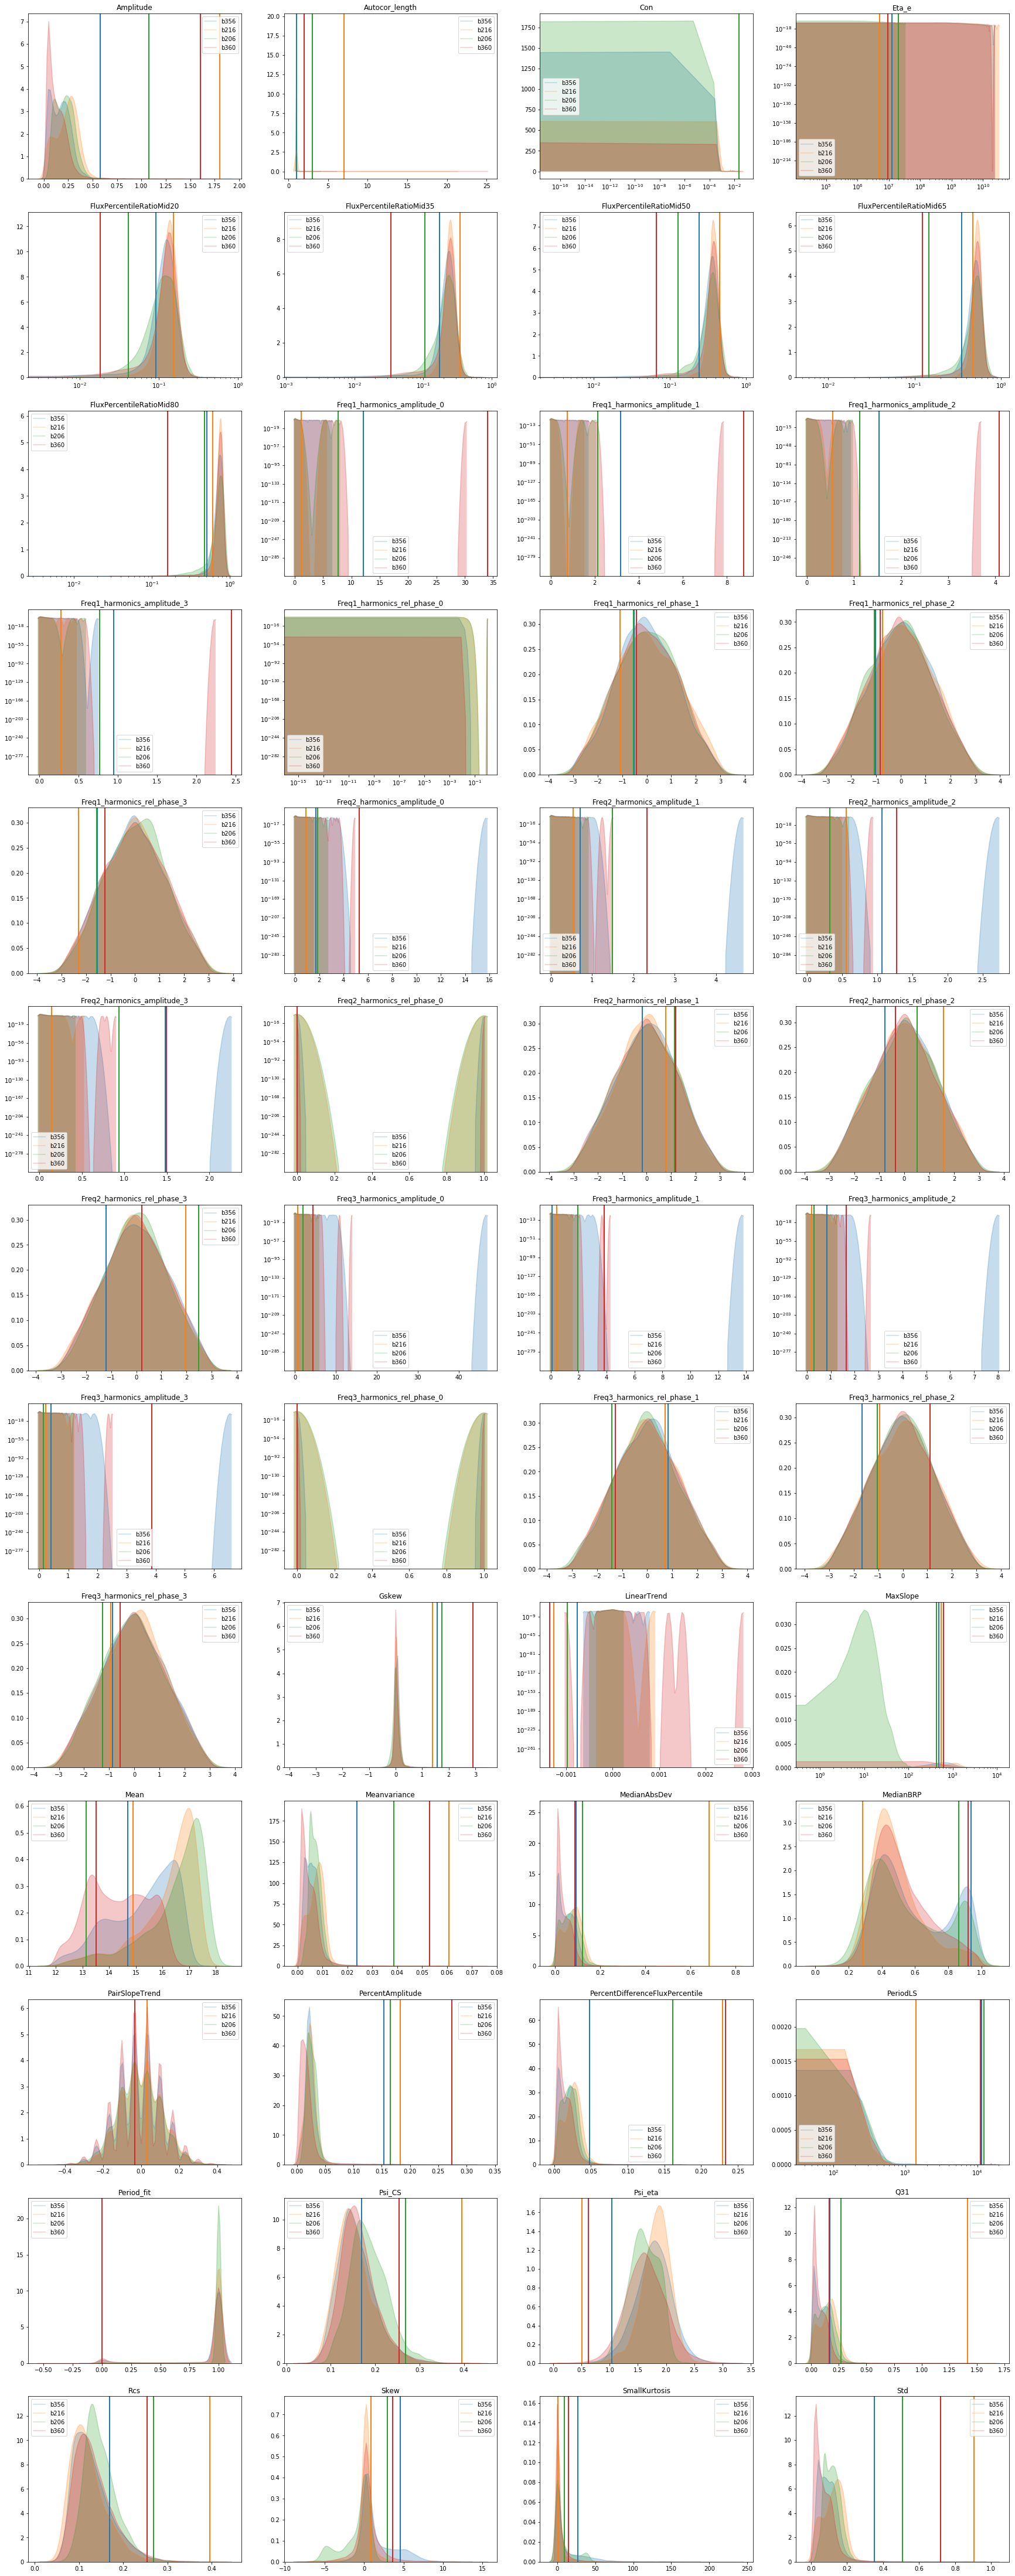

In [48]:
fig, axes = plt.subplots(13, 4, figsize=(30, 80))

faxes = {}
for feat, ax in zip(feats, it.chain(*axes)):
        ax.set_title(feat)
        faxes[feat] = ax


for tile in df.columns:

    tdf = pd.read_pickle(path.format(tile=tile))
    tdf = tdf.replace([np.inf, -np.inf], np.nan)
    
    for feat, ax in faxes.items():
        values = tdf[feat].dropna()
        blz = df[tile][feat]
        if not values.std():
            values[-1] = values[0] + 1
            
        try:
            sns.kdeplot(values, ax=ax, label=tile, shade=True, alpha=.25)
        except Exception as err:
            print(err, feat, tile, values.std())
        
        color = ax.get_lines()[-1].get_color()
        ax.axvline(blz, color=color, linewidth=2)

        plot_conf = feat_plot_conf[feat]
        if plot_conf.get('xscale') is not None:
            ax.set_xscale(plot_conf['xscale'])
        if plot_conf.get('yscale') is not None:
            ax.set_yscale(plot_conf['yscale'])
            

In [89]:
def plot_feat(feat, df=df, feat_plot_conf=feat_plot_conf):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    #fig, axes = plt.subplots(4, 1, figsize=(12, 8))
    ax.set_title(feat)
    #plt.title(feat)
    for tile in df.columns:

        tdf = pd.read_pickle(path.format(tile=tile))
        tdf = tdf.replace([np.inf, -np.inf], np.nan)
        
        values = tdf[feat].dropna()
        blz = df[tile][feat]
        if not values.std():
            values[-1] = values[0] + 1

        try:
            sns.kdeplot(values, ax=ax, label=tile, shade=True, alpha=.25)
        except Exception as err:
            print(err, feat, tile, values.std())

        color = ax.get_lines()[-1].get_color()
        plt.axvline(blz, color=color, linewidth=2)

        plot_conf = feat_plot_conf[feat]
        if plot_conf.get('xscale') is not None:
            ax.set_xscale(plot_conf['xscale'])
        if plot_conf.get('yscale') is not None:
            ax.set_yscale(plot_conf['yscale'])


In [150]:
def plot_feat_fourpanel(feat, df=df, feat_plot_conf=feat_plot_conf):
    fig, axes = plt.subplots(4, 1, figsize=(8, 8), sharex=True)
    
    #plt.title(feat)
    
    for tile, ax in zip(df.columns, axes):

        tdf = pd.read_pickle(path.format(tile=tile))
        tdf = tdf.replace([np.inf, -np.inf], np.nan)
        
        values = tdf[feat].dropna()
        blz = df[tile][feat]
        
        if not values.std():
            values[-1] = values[0] + 1

        try:
            sns.kdeplot(values, ax=ax, label=tile, shade=True, alpha=.5, color='black')
        except Exception as err:
            print(err, feat, tile, values.std())

        color = ax.get_lines()[-1].get_color()
        ax.axvline(blz, color=color, linewidth=2)
        ax.set_ylim(ymin=0)

        plot_conf = feat_plot_conf[feat]
        if plot_conf.get('xscale') is not None:
            ax.set_xscale(plot_conf['xscale'])
        if plot_conf.get('yscale') is not None:
            ax.set_yscale(plot_conf['yscale'])

-----------------------

Este va, para mi esta bueno ver que tienen amplitud importante. Es un feature facil de explicar y narrar

In [151]:
plt.rcParams['font.size'] = 14

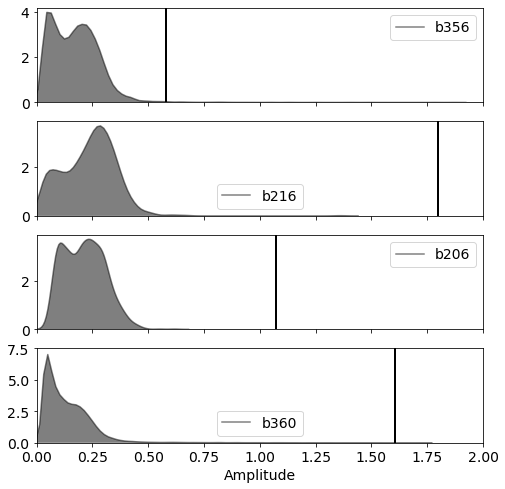

In [152]:
feat_plot_conf['Amplitude'] = {'xscale': 'linear', 'yscale': 'linear'}
axes = plot_feat_fourpanel('Amplitude', feat_plot_conf=feat_plot_conf)
plt.ylim(0, 7.5)
plt.tick_params(labelsize=14)
plt.xlim(0, 2.0)
plt.xlabel('Amplitude')
plt.savefig('plots_blazars/amplitude.png')

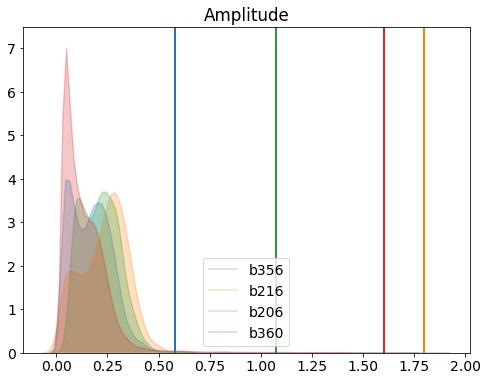

In [146]:
feat_plot_conf['Amplitude'] = {'xscale': 'linear', 'yscale': 'linear'}
plot_feat('Amplitude', feat_plot_conf=feat_plot_conf)
plt.ylim(0, 7.5)
plt.tick_params(labelsize=14)

---------------------------------------

Este no va para nada.

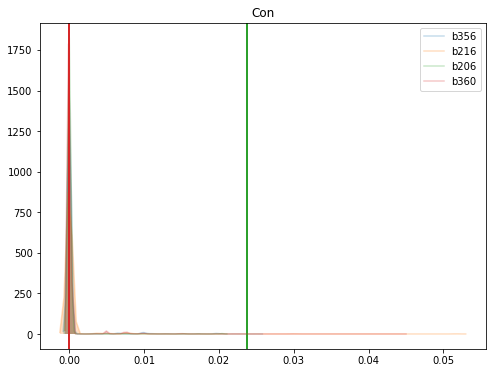

In [7]:
feat_plot_conf['Con'] = {'xscale': 'linear', 'yscale': 'linear'}
plot_feat('Con', feat_plot_conf=feat_plot_conf)

-----------------------

Este tampoco

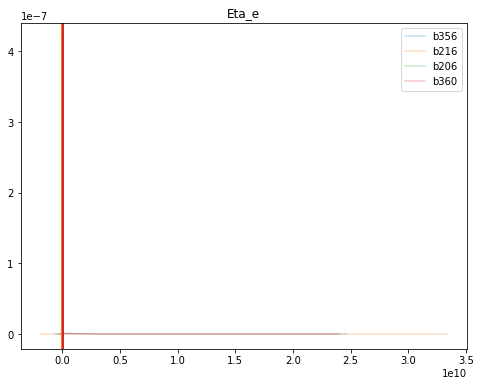

In [8]:
feat_plot_conf['Eta_e'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Eta_e', feat_plot_conf=feat_plot_conf)


-------------

Este puede ser, aunque son features complicados de explicar. Y tampoco ayudan mucho a la causa.

(-0.01, 0.4)

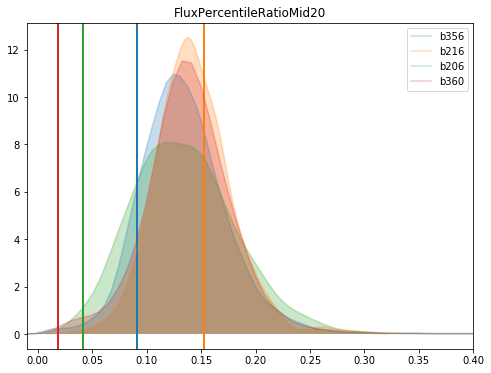

In [9]:
feat_plot_conf['FluxPercentileRatioMid20'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('FluxPercentileRatioMid20', feat_plot_conf=feat_plot_conf)
plt.xlim(-0.01, 0.4)

(-0.1, 0.7)

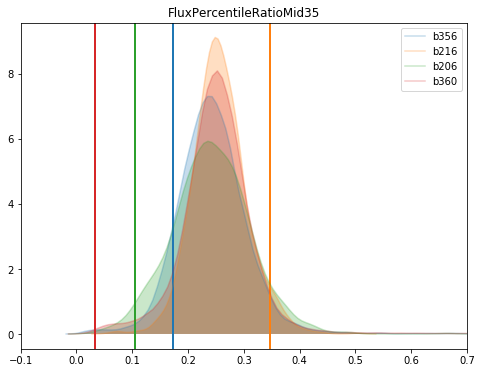

In [10]:
feat_plot_conf['FluxPercentileRatioMid35'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('FluxPercentileRatioMid35', feat_plot_conf=feat_plot_conf)
plt.xlim(-0.1, 0.7)

(-0.1, 0.7)

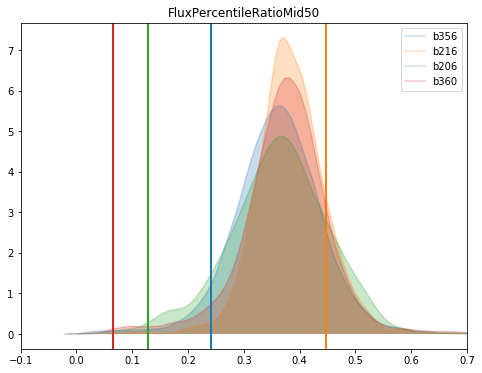

In [11]:
feat_plot_conf['FluxPercentileRatioMid50'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('FluxPercentileRatioMid50', feat_plot_conf=feat_plot_conf)
plt.xlim(-0.1, 0.7)

(0.0, 0.9)

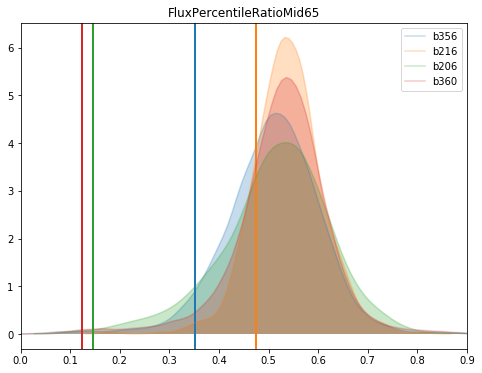

In [12]:
feat_plot_conf['FluxPercentileRatioMid65'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('FluxPercentileRatioMid65', feat_plot_conf=feat_plot_conf)
plt.xlim(0.0, 0.9)

este sin embargo esta un poco mejor (digamos los blazares en las colas de distribucion)

(0.0, 1.1)

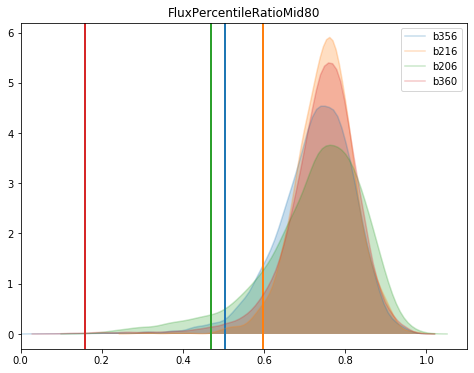

In [13]:
feat_plot_conf['FluxPercentileRatioMid80'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('FluxPercentileRatioMid80', feat_plot_conf=feat_plot_conf)
plt.xlim(0.0, 1.1)

----------------

Aca hay como tres paquetes de features. _Freq1_, _Freq2_, y _Freq3_

Lo que noto es que las amplitudes necesitan escala $log(x)$

Pero al menos los blazares caen lejos. 

Para mi van todos excepto las llamadas `rel_phase_x`

### Freq1

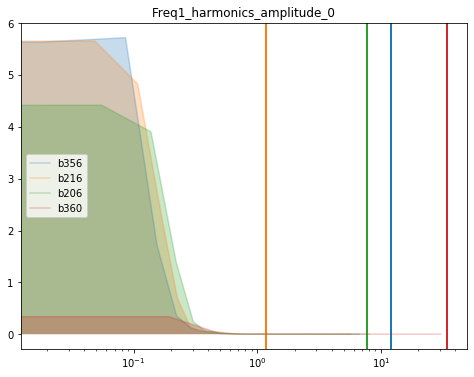

In [14]:
feat_plot_conf['Freq1_harmonics_amplitude_0'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq1_harmonics_amplitude_0', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

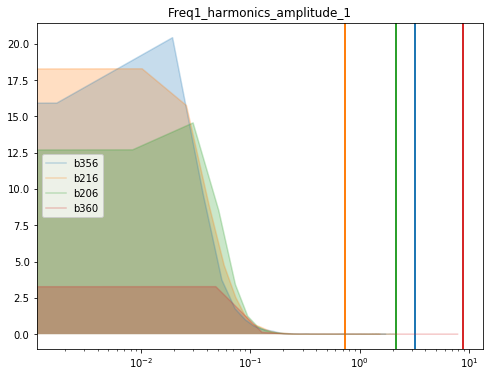

In [15]:
feat_plot_conf['Freq1_harmonics_amplitude_1'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq1_harmonics_amplitude_1', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

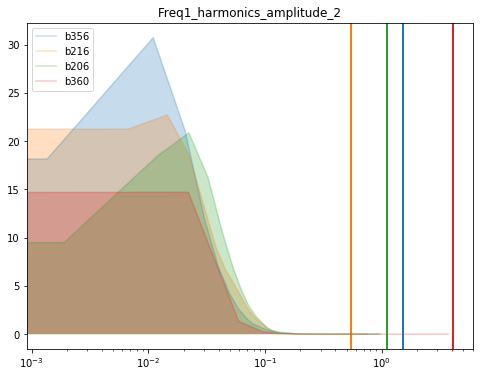

In [16]:
feat_plot_conf['Freq1_harmonics_amplitude_2'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq1_harmonics_amplitude_2', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

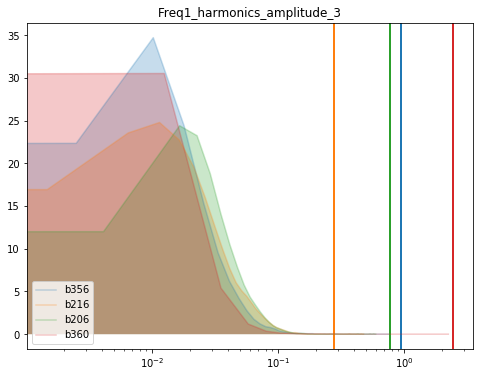

In [17]:
feat_plot_conf['Freq1_harmonics_amplitude_3'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq1_harmonics_amplitude_3', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

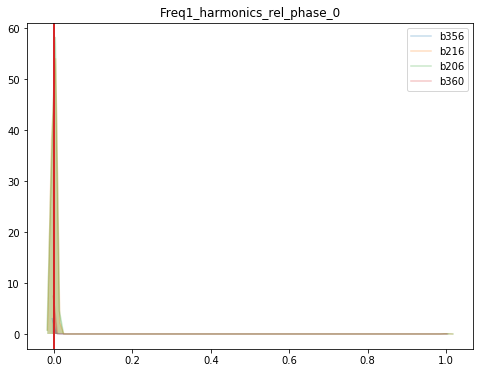

In [18]:
feat_plot_conf['Freq1_harmonics_rel_phase_0'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq1_harmonics_rel_phase_0', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

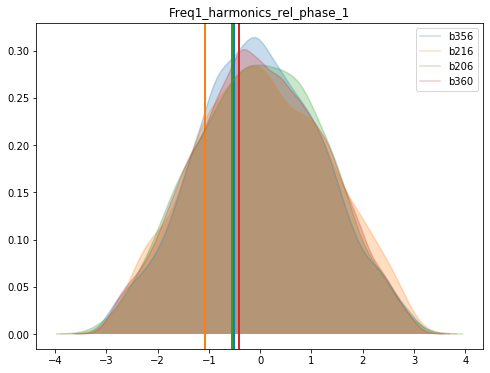

In [19]:
feat_plot_conf['Freq1_harmonics_rel_phase_1'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq1_harmonics_rel_phase_1', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

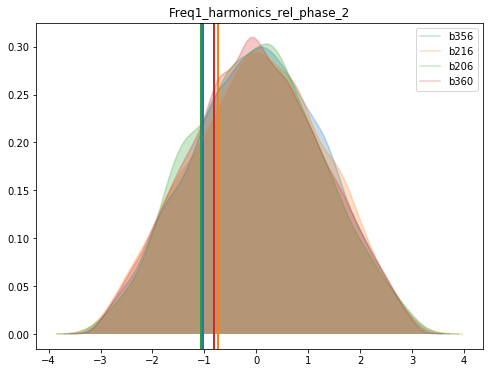

In [20]:
feat_plot_conf['Freq1_harmonics_rel_phase_2'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq1_harmonics_rel_phase_2', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

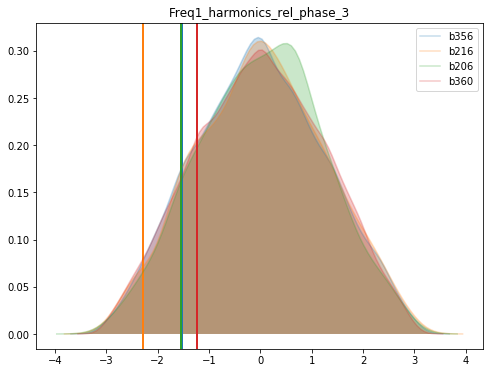

In [21]:
feat_plot_conf['Freq1_harmonics_rel_phase_3'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq1_harmonics_rel_phase_3', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

### Freq2

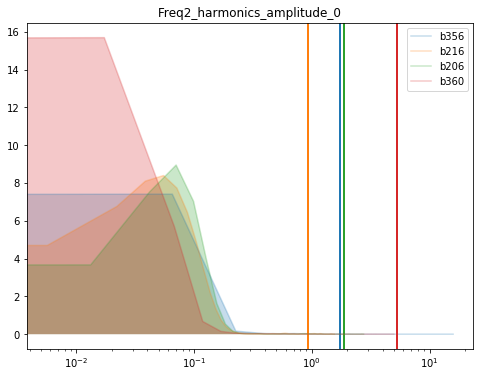

In [22]:
feat_plot_conf['Freq2_harmonics_amplitude_0'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq2_harmonics_amplitude_0', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

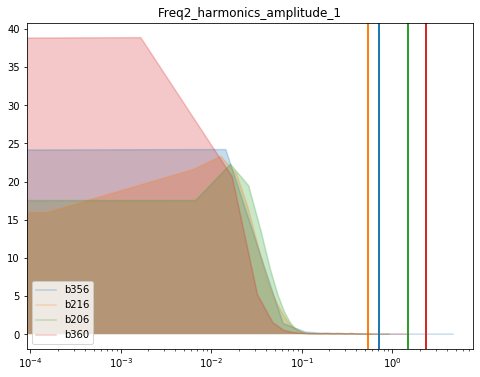

In [23]:
feat_plot_conf['Freq2_harmonics_amplitude_1'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq2_harmonics_amplitude_1', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

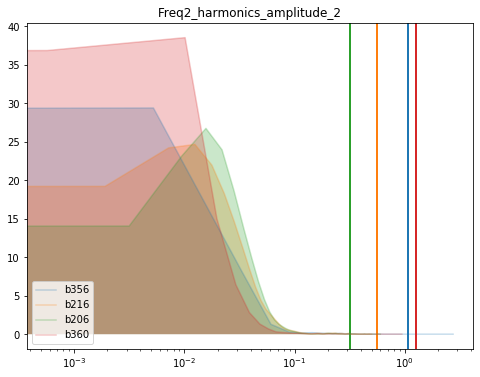

In [24]:
feat_plot_conf['Freq2_harmonics_amplitude_2'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq2_harmonics_amplitude_2', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

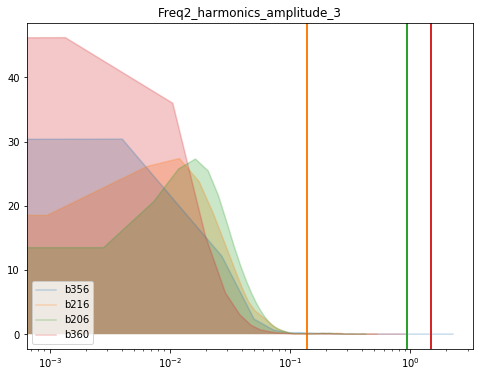

In [25]:
feat_plot_conf['Freq2_harmonics_amplitude_3'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq2_harmonics_amplitude_3', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

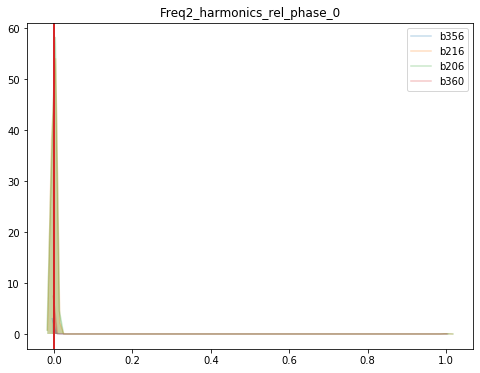

In [26]:
feat_plot_conf['Freq2_harmonics_rel_phase_0'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq2_harmonics_rel_phase_0', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

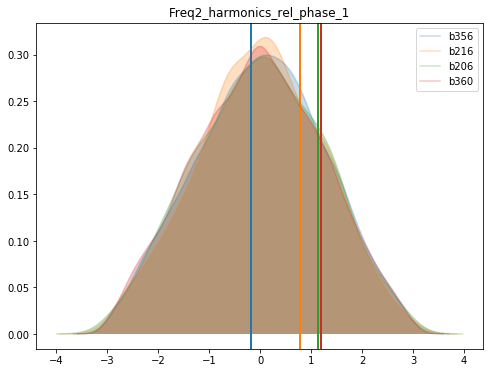

In [27]:
feat_plot_conf['Freq2_harmonics_rel_phase_1'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq2_harmonics_rel_phase_1', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

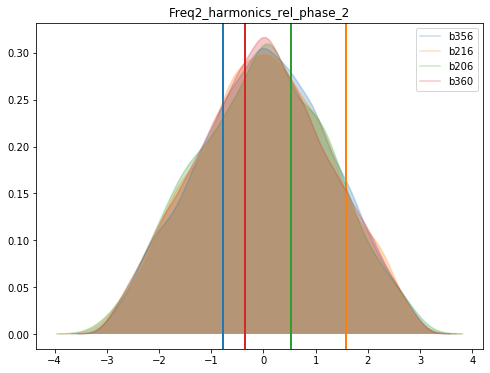

In [28]:
feat_plot_conf['Freq2_harmonics_rel_phase_2'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq2_harmonics_rel_phase_2', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

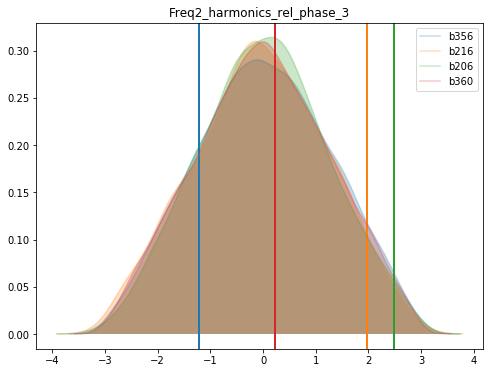

In [29]:
feat_plot_conf['Freq2_harmonics_rel_phase_3'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq2_harmonics_rel_phase_3', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

### Freq3

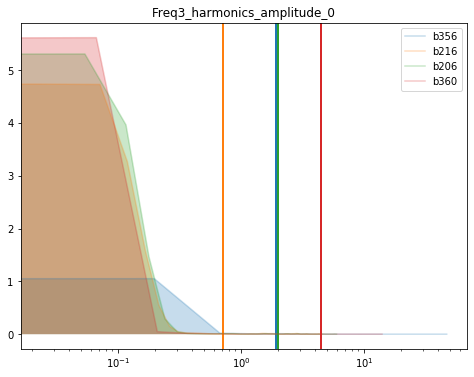

In [30]:
feat_plot_conf['Freq3_harmonics_amplitude_0'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq3_harmonics_amplitude_0', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

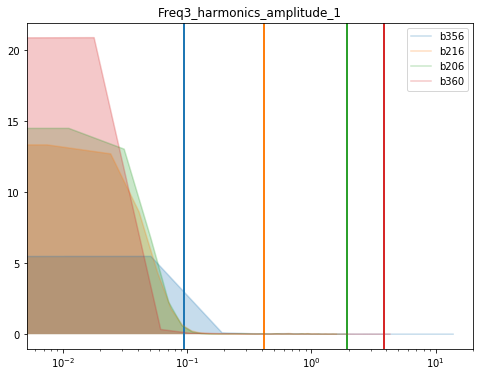

In [31]:
feat_plot_conf['Freq3_harmonics_amplitude_1'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq3_harmonics_amplitude_1', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

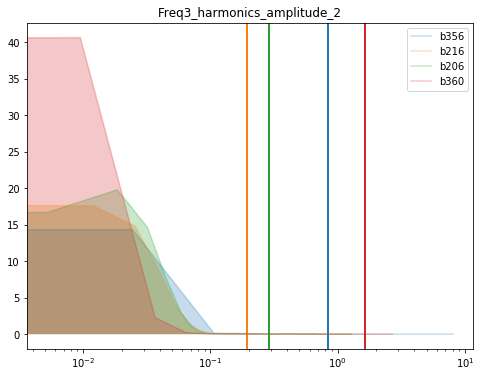

In [32]:
feat_plot_conf['Freq3_harmonics_amplitude_2'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq3_harmonics_amplitude_2', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

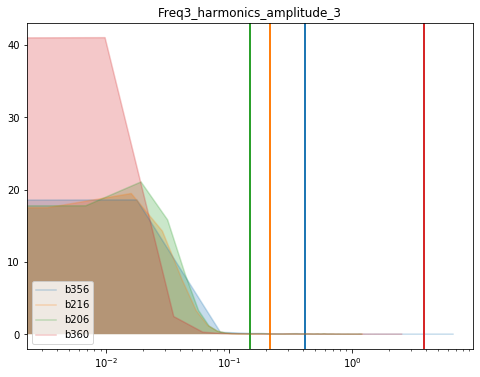

In [33]:
feat_plot_conf['Freq3_harmonics_amplitude_3'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('Freq3_harmonics_amplitude_3', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

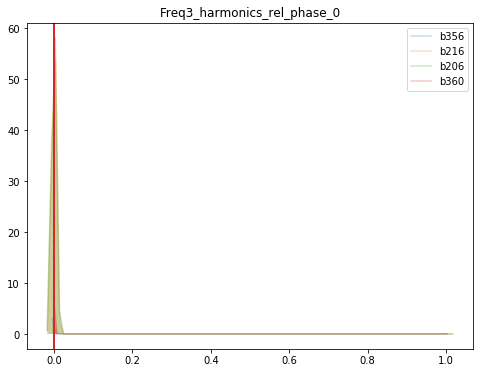

In [34]:
feat_plot_conf['Freq3_harmonics_rel_phase_0'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq3_harmonics_rel_phase_0', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

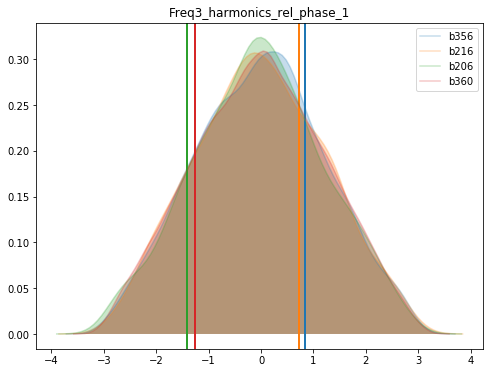

In [35]:
feat_plot_conf['Freq3_harmonics_rel_phase_1'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq3_harmonics_rel_phase_1', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

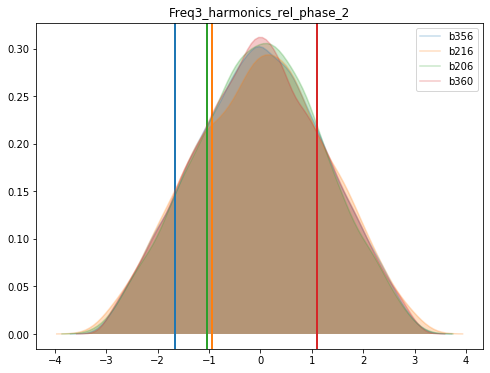

In [36]:
feat_plot_conf['Freq3_harmonics_rel_phase_2'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq3_harmonics_rel_phase_2', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

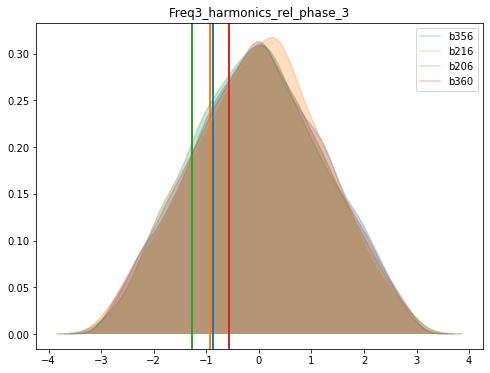

In [37]:
feat_plot_conf['Freq3_harmonics_rel_phase_3'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Freq3_harmonics_rel_phase_3', feat_plot_conf=feat_plot_conf)
#plt.xlim(0.0, 1.1)

------------------------

Las de aca se ven todas bien, digamos. Pueden ir por mi.

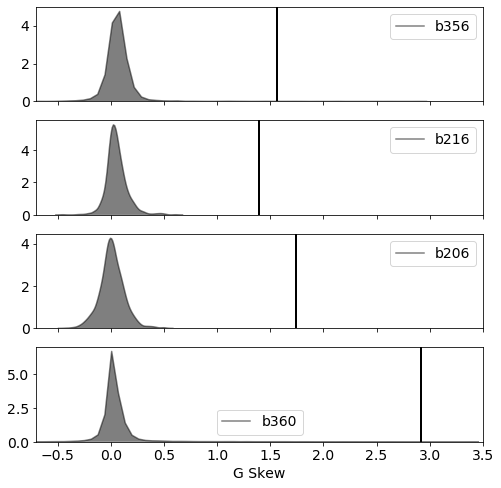

In [158]:
feat_plot_conf['Gskew'] = {'xscale': 'linear', 'yscale': 'linear'}
axes = plot_feat_fourpanel('Gskew', feat_plot_conf=feat_plot_conf)
plt.ylim(0, 7.)
plt.xlim(-0.7, 3.5)
plt.tick_params(labelsize=14)
plt.xlabel('G Skew')
plt.savefig('plots_blazars/gskew.png')

(0, 7)

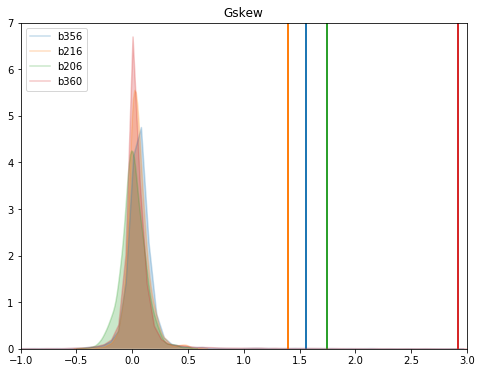

In [38]:
feat_plot_conf['Gskew'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Gskew', feat_plot_conf=feat_plot_conf)
plt.xlim(-1.0, 3)
plt.ylim(0, 7)

(0, 15500)

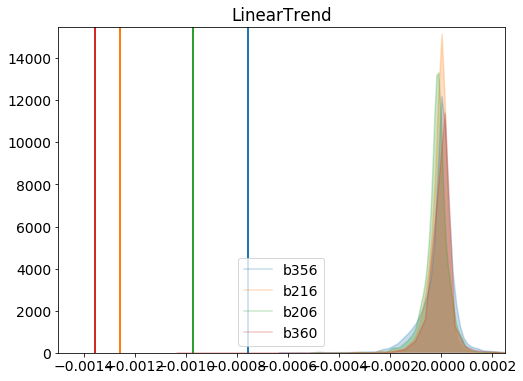

In [93]:
feat_plot_conf['LinearTrend'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('LinearTrend', feat_plot_conf=feat_plot_conf)
plt.xlim(-1.5*10e-4, 2.5*10e-5)
plt.ylim(0, 15500)

(0, 0.005)

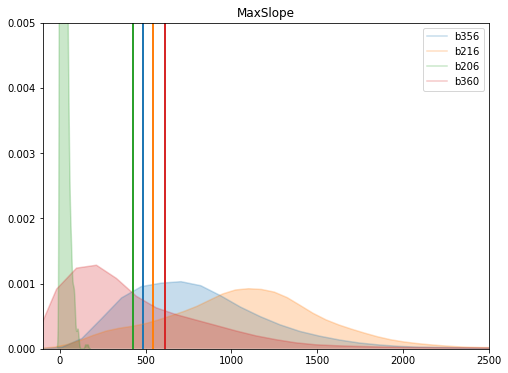

In [40]:
feat_plot_conf['MaxSlope'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('MaxSlope', feat_plot_conf=feat_plot_conf)
plt.xlim(-100., 2.5*10e2)
plt.ylim(0, 0.005)

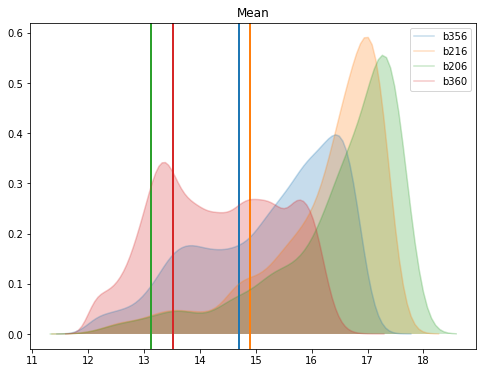

In [41]:
feat_plot_conf['Mean'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Mean', feat_plot_conf=feat_plot_conf)
#plt.xlim(-100., 2.5*10e2)
#plt.ylim(0, 0.005)

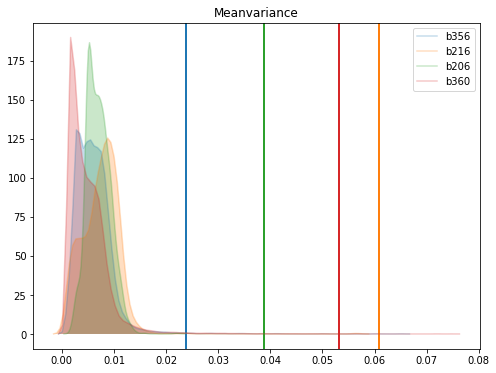

In [42]:
feat_plot_conf['Meanvariance'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Meanvariance', feat_plot_conf=feat_plot_conf)
#plt.xlim(-100., 2.5*10e2)
#plt.ylim(0, 0.005)

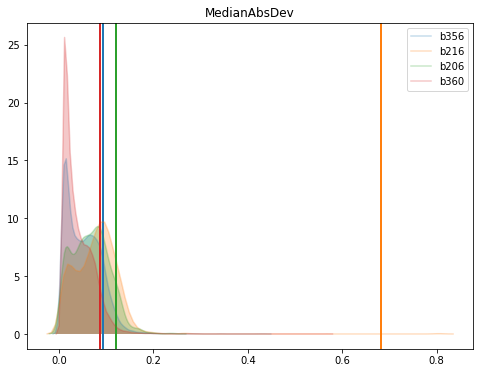

In [43]:
feat_plot_conf['MedianAbsDev'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('MedianAbsDev', feat_plot_conf=feat_plot_conf)
#plt.xlim(-100., 2.5*10e2)
#plt.ylim(0, 0.005)

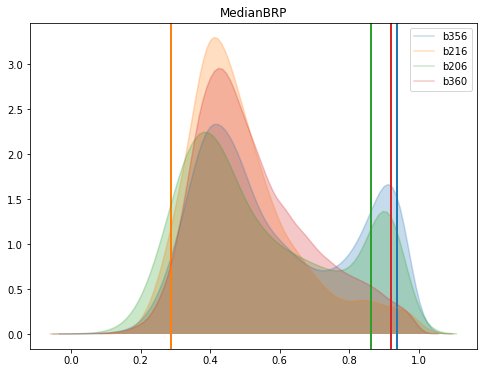

In [44]:
feat_plot_conf['MedianBRP'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('MedianBRP', feat_plot_conf=feat_plot_conf)
#plt.xlim(-100., 2.5*10e2)
#plt.ylim(0, 0.005)

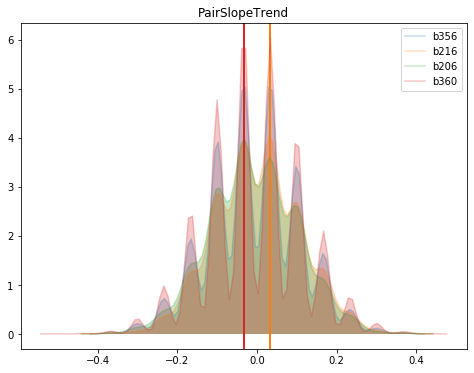

In [45]:
feat_plot_conf['PairSlopeTrend'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('PairSlopeTrend', feat_plot_conf=feat_plot_conf)
#plt.xlim(-100., 2.5*10e2)
#plt.ylim(0, 0.005)

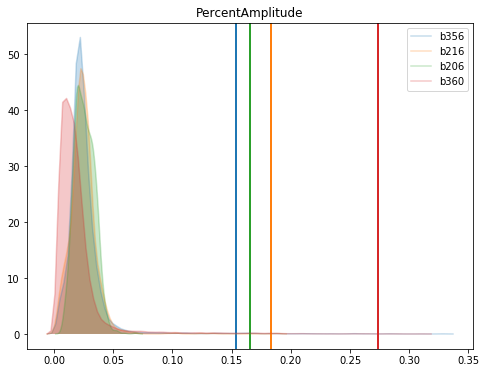

In [46]:
feat_plot_conf['PercentAmplitude'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('PercentAmplitude', feat_plot_conf=feat_plot_conf)
#plt.xlim(-100., 2.5*10e2)
#plt.ylim(0, 0.005)

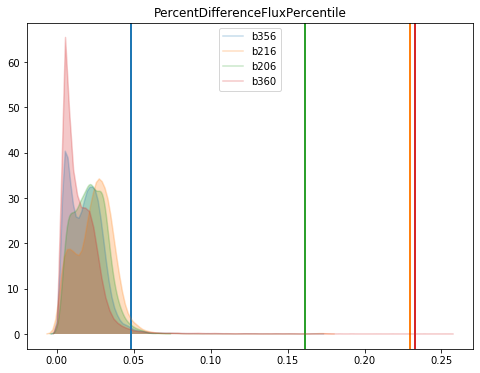

In [47]:
feat_plot_conf['PercentDifferenceFluxPercentile'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('PercentDifferenceFluxPercentile', feat_plot_conf=feat_plot_conf)
#plt.xlim(-100., 2.5*10e2)
#plt.ylim(0, 0.005)

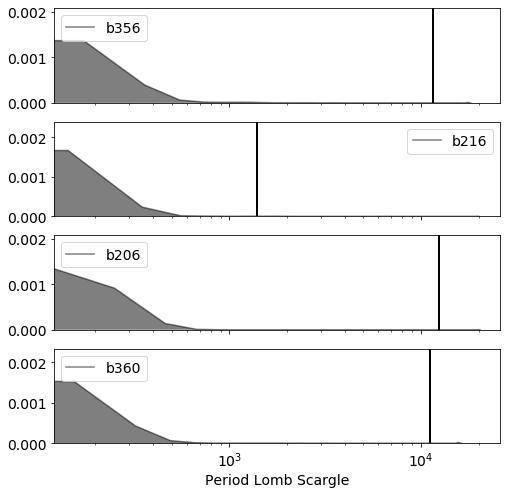

In [161]:
feat_plot_conf['PeriodLS'] = {'xscale': 'log', 'yscale': 'linear'}
axes = plot_feat_fourpanel('PeriodLS', feat_plot_conf=feat_plot_conf)
#plt.ylim(0, 7.)
#plt.xlim(-0.7, 3.5)
plt.tick_params(labelsize=14)
plt.xlabel('Period Lomb Scargle')
plt.savefig('plots_blazars/PeriodLS.png')

(0, 0.0028)

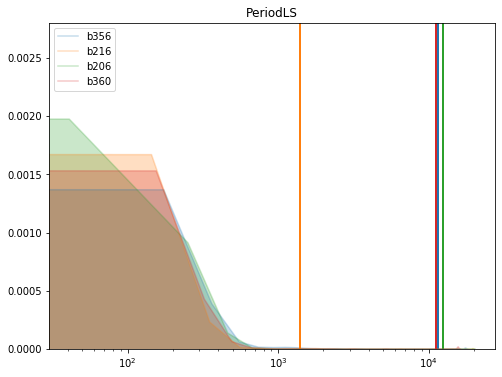

In [48]:
feat_plot_conf['PeriodLS'] = {'xscale':'log', 'yscale':'linear'}
plot_feat('PeriodLS', feat_plot_conf=feat_plot_conf)
#plt.xlim(-500., 1.5*10e3)
plt.ylim(0, 0.0028)

(-0.25, 1.1)

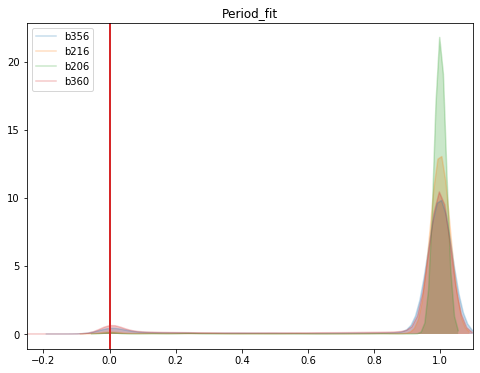

In [49]:
feat_plot_conf['Period_fit'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Period_fit', feat_plot_conf=feat_plot_conf)
plt.xlim(-0.25, 1.1)
#plt.ylim(0, 0.0028)

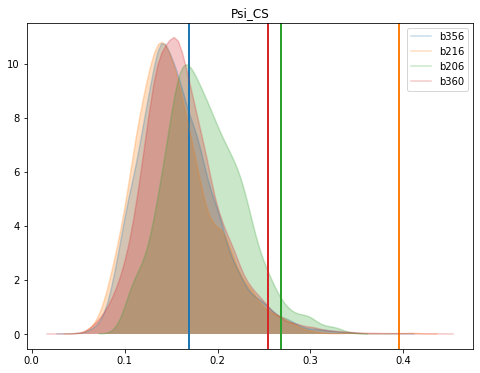

In [50]:
feat_plot_conf['Psi_CS'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Psi_CS', feat_plot_conf=feat_plot_conf)
#plt.xlim(-500., 1.5*10e3)
#plt.ylim(0, 0.0028)

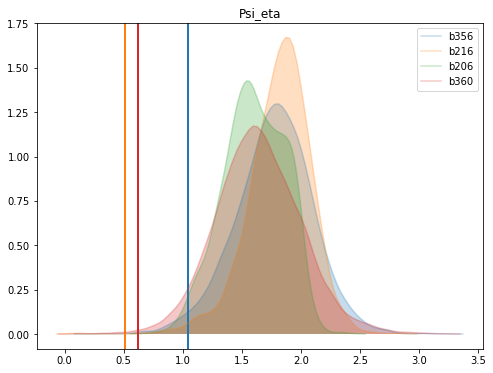

In [51]:
feat_plot_conf['Psi_eta'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Psi_eta', feat_plot_conf=feat_plot_conf)
#plt.xlim(-500., 1.5*10e3)
#plt.ylim(0, 0.0028)

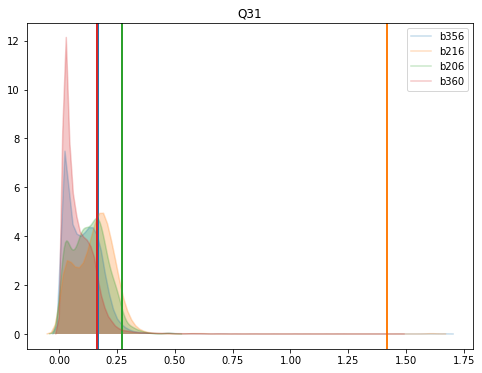

In [52]:
feat_plot_conf['Q31'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Q31', feat_plot_conf=feat_plot_conf)
#plt.xlim(-500., 1.5*10e3)
#plt.ylim(0, 0.0028)

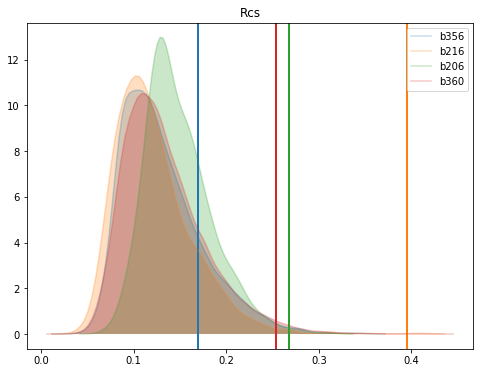

In [53]:
feat_plot_conf['Rcs'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Rcs', feat_plot_conf=feat_plot_conf)
#plt.xlim(-500., 1.5*10e3)
#plt.ylim(0, 0.0028)

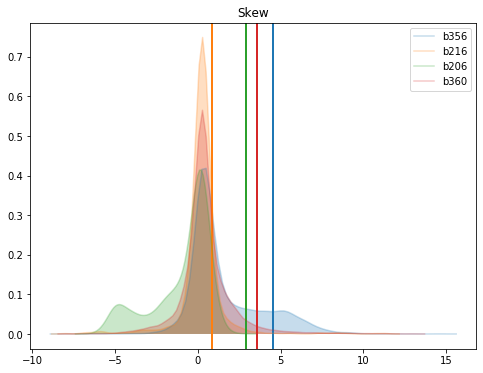

In [54]:
feat_plot_conf['Skew'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Skew', feat_plot_conf=feat_plot_conf)
#plt.xlim(-500., 1.5*10e3)
#plt.ylim(0, 0.0028)

(-5.0, 80)

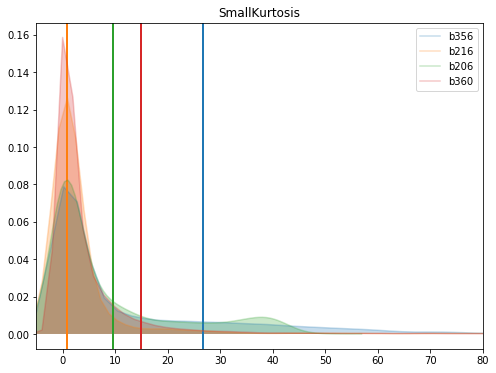

In [55]:
feat_plot_conf['SmallKurtosis'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('SmallKurtosis', feat_plot_conf=feat_plot_conf)
plt.xlim(-5., 80)
#plt.ylim(0, 0.0028)

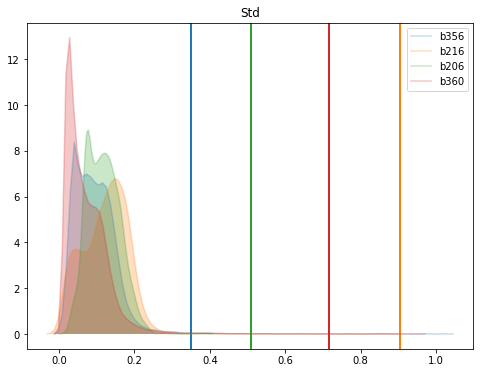

In [56]:
feat_plot_conf['Std'] = {'xscale':'linear', 'yscale':'linear'}
plot_feat('Std', feat_plot_conf=feat_plot_conf)
#plt.xlim(-500., 1.5*10e3)
#plt.ylim(0, 0.0028)